In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

sys.path.append('../src')
from ocr.normalization import word_normalization, letter_normalization
from ocr import page, words, characters
from ocr.helpers import implt, resize
from ocr.tfhelpers import Model
from ocr.datahelpers import idx2char

Loading segmentation models...


OSError: File C:\Users\Thrivikraman\Desktop\dotslash2\handwriting-ocr-master\src\ocr\../../models/gap-clas/CNN-CG.meta does not exist.

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

In [29]:
IMG = '../data/pages/test4.jpg'    # 1, 2, 3
LANG = 'en'
# You can use only one of these two
# You HABE TO train the CTC model by yourself using word_classifier_CTC.ipynb
MODEL_LOC_CHARS = '../models/char-clas/' + LANG + '/CharClassifier'

In [30]:
CHARACTER_MODEL = Model(MODEL_LOC_CHARS)

OSError: File ../models/char-clas/en/CharClassifier.meta does not exist.

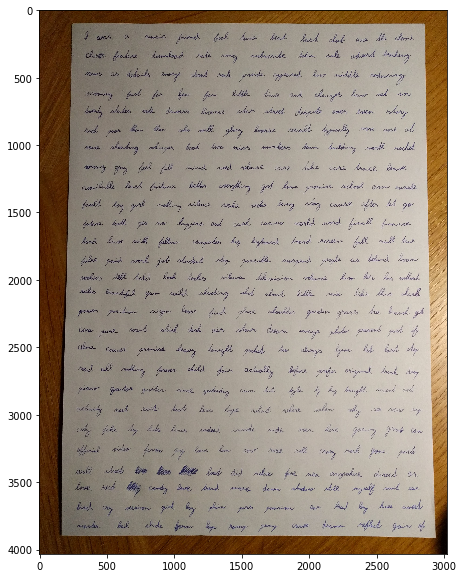

In [25]:
image = cv2.cvtColor(cv2.imread(IMG), cv2.COLOR_BGR2RGB)
implt(image)

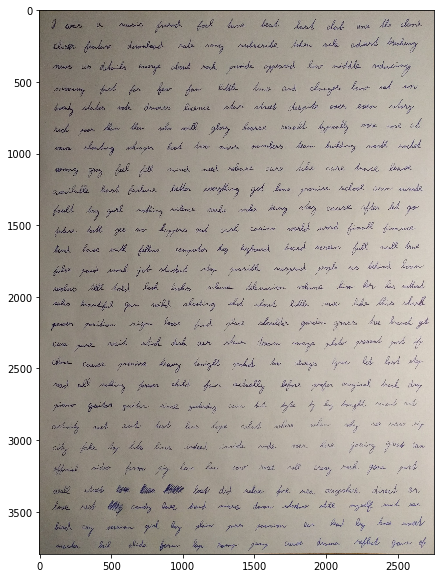

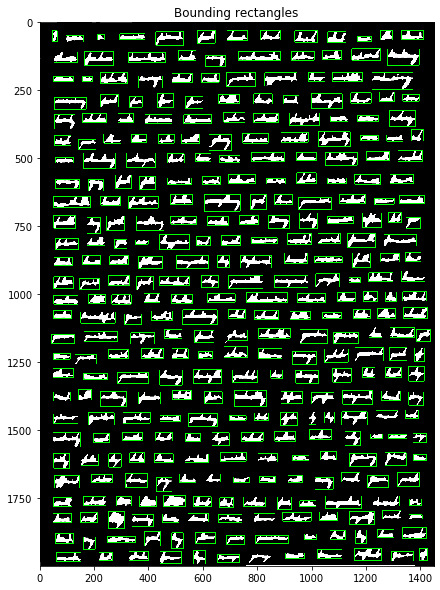

In [26]:
# Crop image and get bounding boxes
crop = page.detection(image)
implt(crop)
boxes = words.detection(crop)
lines = words.sort_words(boxes)

In [27]:
from textblob import TextBlob

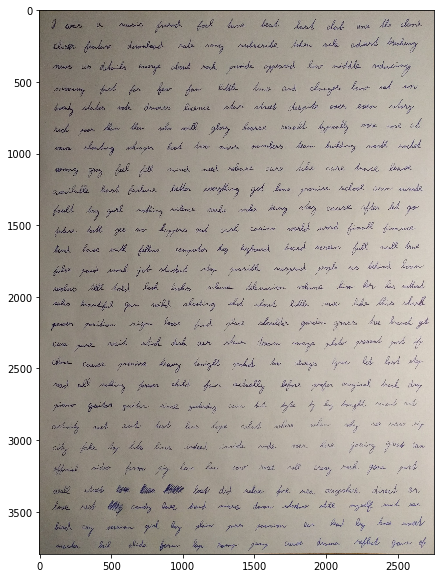

I pas a music friend fool tune beat last club one the alone
closer feature download pale song subscribe token sale avert breaking
news as details every about rock provide appeared low middle reducing
proving fast fur few fun little time and changes law net in
twenty states note drivers licence star stared beside over wen story
rich than then who will glory hoarse result typically sore nose at
poor
voice shouting whisper boot two miss numbers team building north jacket
strong gray fed fill mind need release care take care trace leave
amiable least failure better everything got lone prim school arm minute
fault by girl nothing silence lake woke being stay cause after let go
future tooth yes no happens out cash causing world word finally finance
bond have with fellow computer key keyboard board screen fed null true
false pp took joy strong stop possible suspend people us behind loan
wolves tell told look looks silence television volume him be his without
rules beautiful gun will shooting 

In [28]:
def recognise(img):
    """Recognition using character model"""
    # Pre-processing the word
    img = word_normalization(
        img,
        60,
        border=False,
        tilt=True,
        hyst_norm=True)

    # Separate letters
    img = cv2.copyMakeBorder(
        img,
        0, 0, 30, 30,
        cv2.BORDER_CONSTANT,
        value=[0, 0, 0])
    gaps = characters.segment(img, RNN=True)

    chars = []
    for i in range(len(gaps)-1):
        char = img[:, gaps[i]:gaps[i+1]]
        char, dim = letter_normalization(char, is_thresh=True, dim=True)
        # TODO Test different values
        if dim[0] > 4 and dim[1] > 4:
            chars.append(char.flatten())

    chars = np.array(chars)
    word = ''        
    if len(chars) != 0:
        pred = CHARACTER_MODEL.run(chars)                
        for c in pred:
            word += idx2char(c)

    return str(TextBlob(word).correct())

implt(crop)
for line in lines:
    print(" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))